In [3]:
"""
Case Study: Working with fund data.
Catalyst funds VCA sheet F8, F9, F10.
"""
# Import libraries
import pandas as pd

# Display working directory to extract data there
import os
print(os.getcwd())

# Read data into DataFrames for each fund and encode for foreign language reviews
fund8 = pd.read_csv('fund8.csv', encoding='cp1252')
fund9 = pd.read_csv('fund9.csv', encoding='cp1252')
fund10 = pd.read_csv('fund10.csv', encoding='cp1252')

# Display the column names to assess compatibility across funds
print(fund8.columns)
print(fund9.columns)
print(fund10.columns)

C:\Users\tom
Index(['id', 'Idea Title', 'Challenge', 'Idea URL', 'Assessor',
       'Impact / Alignment Note', 'Impact / Alignment Rating',
       'Feasibility Note', 'Feasibility Rating', 'Auditability Note',
       'Auditability Rating', 'Proposer Mark',
       'Proposer Filtered Out rationale or Feedback', 'Excellent', 'Good',
       'Filtered Out'],
      dtype='object')
Index(['id', 'Challenge', 'Idea Title', 'Idea URL', 'Assessor', 'triplet_id',
       'proposal_id', 'challenge_id', 'Impact / Alignment Note',
       'Impact / Alignment Rating', 'Feasibility Note', 'Feasibility Rating',
       'Auditability Note', 'Auditability Rating', 'Proposer Mark',
       'Proposer Filtered Out rationale or Feedback', 'Result'],
      dtype='object')
Index(['id', 'Reviewer', 'Impact Note', 'Impact Rating', 'Feasibility Note',
       'Feasibility Rating', 'Value for M Note', 'Value for M Rating', 'level',
       'allocated', 'proposal_id', 'URL', 'Proposal Title', 'tot moderations',
       'va

Index(['id', 'Reviewer', 'Impact Note', 'Impact Rating', 'Fund'], dtype='object')
Index(['id', 'Reviewer', 'Impact Note', 'Impact Rating', 'Fund'], dtype='object')
Index(['id', 'Reviewer', 'Impact Note', 'Impact Rating', 'Fund'], dtype='object')
   id         Reviewer                                        Impact Note  \
0   1  z_assessor_1003  CBDCs can either be the enemy of crypto or it'...   
1   2  z_assessor_1003  The project effectively addresses the challeng...   
2   3  z_assessor_1003  The proposal should include audibility improve...   
3   4  z_assessor_1003  Yes the proposal fits the challenge setting. C...   
4   5  z_assessor_1003  This one fooled me at first. My initial reacti...   

   Impact Rating   Fund  lenComment  
0              4  Fund8         772  
1              4  Fund8         833  
2              3  Fund8        2235  
3              4  Fund8         742  
4              5  Fund8        1048  
        Impact Rating   lenComment
Fund                        

C:\Users\tom\AppData\Local\Temp\ipykernel_21460\481115256.py:60: FutureWarning: The provided callable <function mean at 0x0000022C6E864C20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = funds_agg.pivot_table(values='lenComment', index='Fund', columns='Impact Rating', aggfunc=np.mean)


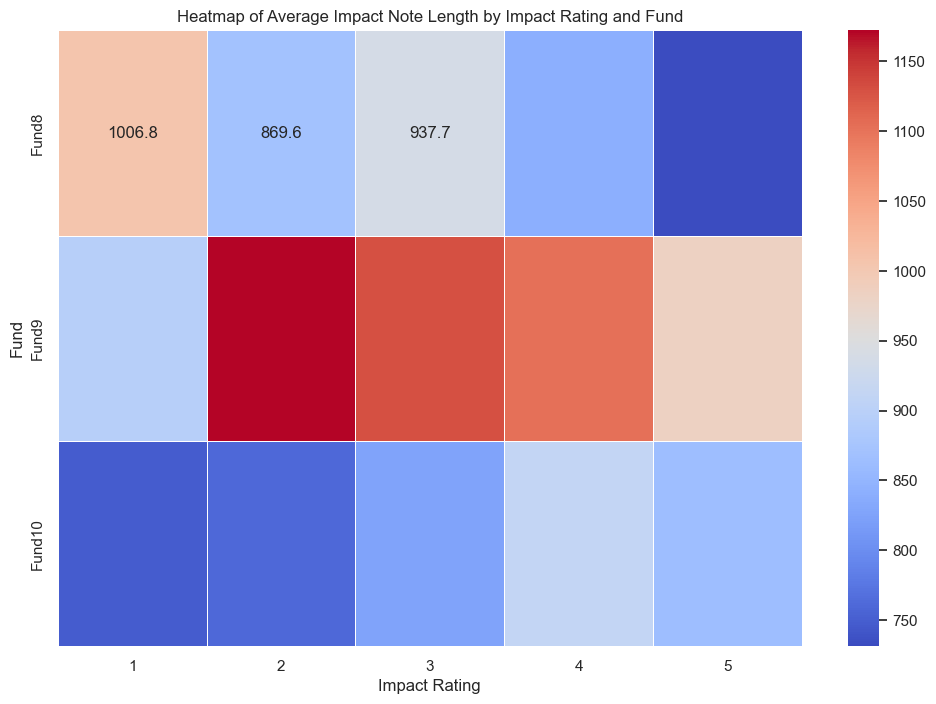

<Figure size 640x480 with 0 Axes>

In [13]:
"""
Case Study: Working with fund data.
Catalyst funds VCA sheet F8, F9, F10.
"""
# Import libraries
import pandas as pd
import numpy as np

# Read data into DataFrames for each fund and encode for foreign language reviews
fund8 = pd.read_csv('fund8.csv', encoding='cp1252')
fund9 = pd.read_csv('fund9.csv', encoding='cp1252')
fund10 = pd.read_csv('fund10.csv', encoding='cp1252')

# We streamline the data by using consistent labels across funds
fund8 = fund8.filter(['id','Assessor', 'Impact / Alignment Note', 'Impact / Alignment Rating'], axis=1)
fund9 = fund9.filter(['id','Assessor', 'Impact / Alignment Note', 'Impact / Alignment Rating'], axis=1)
fund10 = fund10.filter(['id','Reviewer', 'Impact Note', 'Impact Rating'], axis=1)
fund8.rename(columns={'Assessor':'Reviewer', 'Impact / Alignment Note':'Impact Note', 'Impact / Alignment Rating':'Impact Rating'}, inplace=True)
fund9.rename(columns={'Assessor':'Reviewer', 'Impact / Alignment Note':'Impact Note', 'Impact / Alignment Rating':'Impact Rating'}, inplace=True)
fund8['Fund'] = 'Fund8'
fund9['Fund'] = 'Fund9'
fund10['Fund'] = 'Fund10'

# Display the column names again to check if it worked as expected
print(fund8.columns)
print(fund9.columns)
print(fund10.columns)

# Concatenate the DataFrames
funds_agg = pd.concat([fund8, fund9, fund10])

# Ensure 'Impact Note' is a string and 'Impact Rating' is numeric
funds_agg['Impact Note'] = funds_agg['Impact Note'].astype(str)
funds_agg['Impact Rating'] = pd.to_numeric(funds_agg['Impact Rating'], errors='coerce')

# Create a new column for the length of 'Impact Note'
funds_agg['lenComment'] = funds_agg['Impact Note'].apply(len)

# Check the aggregated DataFrame
print(funds_agg.head())

# Group by 'Fund' and calculate mean for 'Impact Rating' and 'Impact Note Length'
grouped_data = funds_agg.groupby('Fund')[['Impact Rating', 'lenComment']].mean()

# Display the results
print(grouped_data)

# Configure IPython to display plots inline
%matplotlib inline

# Import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set()

# Create a pivot table with funds ordered
# Assuming 'Impact Rating' as columns, 'Fund' as index, and the values are the means of 'Impact Note Length'
pivot_table = funds_agg.pivot_table(values='lenComment', index='Fund', columns='Impact Rating', aggfunc=np.mean)

# Explicitly order the index for the funds
pivot_table = pivot_table.reindex(['Fund8', 'Fund9', 'Fund10'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))  # Adjust size as needed
heatmap = sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)

# Customizing the plot with labels and a title
plt.title('Heatmap of Average Impact Note Length by Impact Rating and Fund')
plt.xlabel('Impact Rating')
plt.ylabel('Fund')

# Show the plot
plt.show()

# Save the plot to file
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')